In [1]:
with open('./data/wizard.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [2]:
chars = sorted(set(text))

In [3]:
print(chars)

['\n', ' ', '!', '"', '&', "'", '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\ufeff']


In [4]:
# character Level Tokenizer
###Encodings 
strings_to_int = { ch:i for i , ch in enumerate(chars) }
int_to_string = { i:ch for i, ch in enumerate(chars) }

In [5]:
print("strings to int: ", strings_to_int)
print("int to string: ", int_to_string)

strings to int:  {'\n': 0, ' ': 1, '!': 2, '"': 3, '&': 4, "'": 5, '(': 6, ')': 7, '*': 8, ',': 9, '-': 10, '.': 11, '0': 12, '1': 13, '2': 14, '3': 15, '4': 16, '5': 17, '6': 18, '7': 19, '8': 20, '9': 21, ':': 22, ';': 23, '?': 24, 'A': 25, 'B': 26, 'C': 27, 'D': 28, 'E': 29, 'F': 30, 'G': 31, 'H': 32, 'I': 33, 'J': 34, 'K': 35, 'L': 36, 'M': 37, 'N': 38, 'O': 39, 'P': 40, 'Q': 41, 'R': 42, 'S': 43, 'T': 44, 'U': 45, 'V': 46, 'W': 47, 'X': 48, 'Y': 49, 'Z': 50, '[': 51, ']': 52, '_': 53, 'a': 54, 'b': 55, 'c': 56, 'd': 57, 'e': 58, 'f': 59, 'g': 60, 'h': 61, 'i': 62, 'j': 63, 'k': 64, 'l': 65, 'm': 66, 'n': 67, 'o': 68, 'p': 69, 'q': 70, 'r': 71, 's': 72, 't': 73, 'u': 74, 'v': 75, 'w': 76, 'x': 77, 'y': 78, 'z': 79, '\ufeff': 80}
int to string:  {0: '\n', 1: ' ', 2: '!', 3: '"', 4: '&', 5: "'", 6: '(', 7: ')', 8: '*', 9: ',', 10: '-', 11: '.', 12: '0', 13: '1', 14: '2', 15: '3', 16: '4', 17: '5', 18: '6', 19: '7', 20: '8', 21: '9', 22: ':', 23: ';', 24: '?', 25: 'A', 26: 'B', 27: 'C

In [6]:
encode = lambda s : [strings_to_int[c] for c in s]

In [7]:
decode = lambda l : "".join([int_to_string[i] for i in l])

In [8]:
print(encode("hello"))

[61, 58, 65, 65, 68]


In [9]:
print(decode(encode("hello")))

hello


In [10]:
import torch

In [11]:
torch.__version__

'2.1.1+cpu'

In [12]:
data = torch.tensor(encode(text))

In [13]:
print(data)

tensor([80, 36, 33,  ...,  0,  0,  0])


In [14]:
print(data[:100])

tensor([80, 36, 33, 43, 44,  1, 39, 30,  1, 27, 32, 25, 40, 44, 29, 42, 43,  0,
         0,  0, 27, 32, 25, 40, 44, 29, 42,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 40, 25,
        31, 29,  0,  0,  1,  1, 13,  1, 44, 32])


In [15]:
n = int(0.8 * len(data))
train_data = data[:n]
val_data = data[n:]

In [16]:
round(len(train_data) / len(val_data), 2)

4.0

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [18]:
print(device)

cpu


In [19]:
probabilities = torch.tensor([0.1, 0.9])

In [20]:
probabilities

tensor([0.1000, 0.9000])

In [21]:
samples = torch.multinomial(probabilities, num_samples = 10, replacement = True)

In [22]:
samples

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
tensor_1 = torch.tensor([1, 2, 3, 4, 5])
out = torch.cat((tensor_1, torch.tensor([5])), dim = 0)

In [24]:
out

tensor([1, 2, 3, 4, 5, 5])

In [25]:
out = torch.tril(torch.ones(5, 5))
out # Lower triangles are ones or != 0

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [26]:
out = torch.triu(torch.ones(5,5))
out # Upper Triangles are ones or != 0

tensor([[1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1.]])

In [27]:
torch.stack([torch.tensor([1, 2, 3]), torch.tensor([4, 5, 6]), torch.tensor([7, 8, 9])])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [44]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

test_tesnsor_1 = torch.arange(start=-10, end=11, step=1, dtype=torch.float32)

softmax_output = F.softmax(test_tesnsor_1, dim=0, dtype=torch.float32)

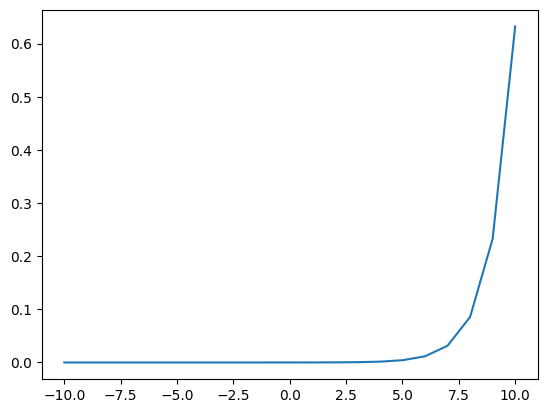

In [45]:
plt.plot(test_tesnsor_1.tolist(), softmax_output.tolist())

In [47]:
def softmax_fn(x: torch.Tensor) -> torch.Tensor:
    a = torch.exp(x)
    z = a / a.sum()
    return z

output = softmax_fn(test_tesnsor_1)

In [48]:
output

tensor([1.3029e-09, 3.5416e-09, 9.6272e-09, 2.6169e-08, 7.1136e-08, 1.9337e-07,
        5.2563e-07, 1.4288e-06, 3.8839e-06, 1.0557e-05, 2.8698e-05, 7.8010e-05,
        2.1205e-04, 5.7642e-04, 1.5669e-03, 4.2592e-03, 1.1578e-02, 3.1471e-02,
        8.5548e-02, 2.3254e-01, 6.3212e-01])

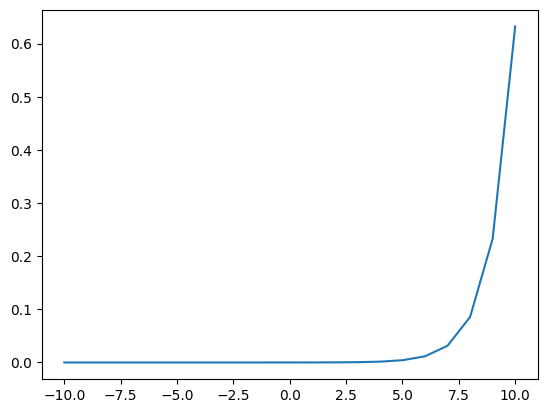

In [50]:
plt.plot(test_tesnsor_1.tolist(), output.tolist())

In [51]:
vocab_size = 10000
embedding_dim = 100
embedding = torch.nn.Embedding(vocab_size, embedding_dim)

input_indices = torch.LongTensor([1, 4, 2, 34, 5])
embedding_output = embedding(input_indices)

In [53]:
embedding_output.shape

torch.Size([5, 100])

In [54]:
embedding_output[3]

tensor([-0.6075,  0.1272, -0.8133,  1.0169,  2.2670, -0.1248, -0.7000,  1.0632,
         1.4087,  1.6980,  0.3923,  0.3608,  0.1239,  0.2914,  0.1294,  0.1146,
        -0.1760, -1.0777, -0.0729,  1.5837,  0.6229, -0.7794,  1.9262, -0.9204,
        -0.5800, -0.4365,  0.7887,  0.2328, -1.7673,  1.3237, -0.1362, -0.2162,
        -0.0550,  0.5036, -1.9561, -0.0576, -0.7510,  1.3693, -1.1214, -0.2021,
         0.4063,  1.2688, -0.0643,  0.4167, -0.4012, -0.0829, -1.3007,  0.2641,
        -1.3897,  1.0875, -1.1159,  0.5719,  0.1930,  0.7543, -0.7164,  0.6824,
        -0.3622,  0.0728, -1.9690, -0.6131,  0.2149, -0.0403, -0.3723, -2.5606,
         0.2751,  0.8846, -0.1096, -0.7264,  0.4104, -0.2859,  1.3997, -0.6067,
         0.4175, -0.5588, -1.1105, -1.3900, -0.7220,  0.7639, -0.8098,  0.2311,
        -1.5499, -0.5646,  0.3477,  1.7025,  1.4745,  1.3248,  0.4584, -0.7032,
         0.8503,  0.5766,  0.1196, -1.2077, -1.4291,  0.8200, -0.0301, -0.4435,
        -1.4460,  1.3973, -1.6711, -0.56

In [ ]:
class ModelV1(torch.nn.Module):
    def __init__(self, vocab_size) -> None:
        super().__init__()
        self.token_embedding_table = torch.nn.Embedding(vocab_size, vocab_size)

    def forwards(self, index, targets):
        logits = self.token_embedding_table(index)
        return logits